#UN Trends in International Migrant Stock - Data Visualization
By: Yifei Chen 
Date: Dec 15, 2022
Shareable link: https://colab.research.google.com/drive/1Yj1ETij_7XCfNphJzr40WQbeWpAPeugi?usp=sharing 

##Introduction
Dataset: International Migrant stock trends from 1990 to 2015 -  The 2015 revision from United Nation's website.

#Table 1： International migrant stock


###Load Table 1, data preparation, data cleaning 
Import primary modules and Imported raw data into a pandas dataframe. Let's start with table 1. 

In [29]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#import raw data and table 1 
df_intms = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 1') 

#look at first 20 items in the dataset 
df_intms.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,Trends in International Migrant Stock: The 201...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,Table 1 - International migrant stock at mid-...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,POP/DB/MIG/Stock/Rev.2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset does not have the right header assigned, useful data starts at row 13. 

Let's get some high level insights about the dataset which help me clean the data. 

In [30]:
#Get high level pandas functionalities
df_intms.info()
df_intms.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   266 non-null    object 
 1   Unnamed: 1   266 non-null    object 
 2   Unnamed: 2   27 non-null     object 
 3   Unnamed: 3   266 non-null    object 
 4   Unnamed: 4   241 non-null    object 
 5   Unnamed: 5   267 non-null    object 
 6   Unnamed: 6   266 non-null    object 
 7   Unnamed: 7   266 non-null    object 
 8   Unnamed: 8   266 non-null    object 
 9   Unnamed: 9   266 non-null    float64
 10  Unnamed: 10  266 non-null    float64
 11  Unnamed: 11  267 non-null    object 
 12  Unnamed: 12  266 non-null    object 
 13  Unnamed: 13  266 non-null    object 
 14  Unnamed: 14  266 non-null    object 
 15  Unnamed: 15  266 non-null    float64
 16  Unnamed: 16  266 non-null    float64
 17  Unnamed: 17  267 non-null    object 
 18  Unnamed: 18  266 non-null    object 
 19  Unnamed:

,Unnamed: 9,Unnamed: 10,Unnamed: 15,Unnamed: 16,Unnamed: 21,Unnamed: 22
count,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,4.368413e+06,4.835420e+06,2.280930e+06,2.528531e+06,2.087509e+06,2.306916e+06
std,1.887923e+07,2.075374e+07,9.811595e+06,1.082500e+07,9.112168e+06,9.981618e+06
min,1.540000e+02,1.410000e+02,8.500000e+01,7.800000e+01,6.900000e+01,6.300000e+01
25%,3.440200e+04,3.646600e+04,1.698750e+04,1.739100e+04,1.659825e+04,1.826825e+04
50%,2.015450e+05,2.135100e+05,9.047250e+04,1.026085e+05,1.039060e+05,1.093240e+05
75%,1.257349e+06,1.382807e+06,6.138995e+05,7.122210e+05,5.508512e+05,6.159952e+05
max,2.217142e+08,2.437002e+08,1.146137e+08,1.261154e+08,1.071005e+08,1.175848e+08


In [31]:
# get the size of the dataframe
df_intms.shape

(280, 23)

In Table 1, there are duplicated "Year" columns for different sexes (both sexes, male, female) 
Problem: Column names are values not variable names
tidy data principle #2: Column names need to be informative, variable names and not values

Select specific rows or columns or both
So the dataset will start with valid values. 

In [32]:
#get the columns from 1 to 23 and rows from position 14 to 280 
df_intms1= df_intms[df_intms.columns[0:23]].iloc[15:280]
df_intms1.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
15,1,WORLD,NaN,900,NaN,152563212,160801752,172703309,191269100,221714243.0,...,87884839,97866674,114613714.0,126115435.0,74815702,79064275,84818470,93402426,107100529.0,117584801.0
16,2,Developed regions,(b),901,NaN,82378628,92306854,103375363,117181109,132560325.0,...,50536796,57217777,64081077.0,67618619.0,42115231,47214055,52838567,59963332,68479248.0,72863336.0
17,3,Developing regions,(c),902,NaN,70184584,68494898,69327946,74087991,89153918.0,...,37348043,40648897,50532637.0,58496816.0,32700471,31850220,31979903,33439094,38621281.0,44721465.0
18,4,Least developed countries,(d),941,NaN,11075966,11711703,10077824,9809634,10018128.0,...,5361902,5383009,5462714.0,6463217.0,5236216,5573685,4721920,4432371,4560536.0,5493028.0
19,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261,56778501,59244124,64272611,79130668.0,...,31986141,35265888,45069923.0,52033599.0,27464255,26276535,27257983,29006723,34060745.0,39228437.0


In [33]:
#rename columns
df_intms1.columns=['ID','Area','Notes','Country Code','Type of data (a)','Both sexes 1990','Both sexes 1995',
                 'Both sexes 2000', 'Both sexes 2005','Both sexes 2010',
                 'Both sexes 2015', 'Male 1990', 'Male 1995', 'Male 2000', 'Male 2005',    
                 'Male 2010', 'Male 2015', 'Female 1990', 'Female 1995', 'Female 2000',  
                 'Female 2005', 'Female 2010', 'Female 2015']

df_intms1.head()


,ID,Area,Notes,Country Code,Type of data (a),Both sexes 1990,Both sexes 1995,Both sexes 2000,Both sexes 2005,Both sexes 2010,...,Male 2000,Male 2005,Male 2010,Male 2015,Female 1990,Female 1995,Female 2000,Female 2005,Female 2010,Female 2015
15,1,WORLD,NaN,900,NaN,152563212,160801752,172703309,191269100,221714243.0,...,87884839,97866674,114613714.0,126115435.0,74815702,79064275,84818470,93402426,107100529.0,117584801.0
16,2,Developed regions,(b),901,NaN,82378628,92306854,103375363,117181109,132560325.0,...,50536796,57217777,64081077.0,67618619.0,42115231,47214055,52838567,59963332,68479248.0,72863336.0
17,3,Developing regions,(c),902,NaN,70184584,68494898,69327946,74087991,89153918.0,...,37348043,40648897,50532637.0,58496816.0,32700471,31850220,31979903,33439094,38621281.0,44721465.0
18,4,Least developed countries,(d),941,NaN,11075966,11711703,10077824,9809634,10018128.0,...,5361902,5383009,5462714.0,6463217.0,5236216,5573685,4721920,4432371,4560536.0,5493028.0
19,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261,56778501,59244124,64272611,79130668.0,...,31986141,35265888,45069923.0,52033599.0,27464255,26276535,27257983,29006723,34060745.0,39228437.0


In [34]:
# Remove unnecessary columns 
df_intms1 = df_intms1.drop(['Notes','Country Code','Type of data (a)'], axis=1) #Axis 1 will act on all the COLUMNS in each ROW
df_intms1.head()

,ID,Area,Both sexes 1990,Both sexes 1995,Both sexes 2000,Both sexes 2005,Both sexes 2010,Both sexes 2015,Male 1990,Male 1995,Male 2000,Male 2005,Male 2010,Male 2015,Female 1990,Female 1995,Female 2000,Female 2005,Female 2010,Female 2015
15,1,WORLD,152563212,160801752,172703309,191269100,221714243.0,243700236.0,77747510,81737477,87884839,97866674,114613714.0,126115435.0,74815702,79064275,84818470,93402426,107100529.0,117584801.0
16,2,Developed regions,82378628,92306854,103375363,117181109,132560325.0,140481955.0,40263397,45092799,50536796,57217777,64081077.0,67618619.0,42115231,47214055,52838567,59963332,68479248.0,72863336.0
17,3,Developing regions,70184584,68494898,69327946,74087991,89153918.0,103218281.0,37484113,36644678,37348043,40648897,50532637.0,58496816.0,32700471,31850220,31979903,33439094,38621281.0,44721465.0
18,4,Least developed countries,11075966,11711703,10077824,9809634,10018128.0,11951316.0,5843107,6142712,5361902,5383009,5462714.0,6463217.0,5236216,5573685,4721920,4432371,4560536.0,5493028.0
19,5,Less developed regions excluding least develop...,59105261,56778501,59244124,64272611,79130668.0,91262036.0,31641006,30501966,31986141,35265888,45069923.0,52033599.0,27464255,26276535,27257983,29006723,34060745.0,39228437.0


Tidy data principle 1 violation: Column names ("1990", "1995") are values not variable names Column names need to be informative, variable names are not values

In [35]:
#unpivot measured variables to row axis
intms_melt = pd.melt(df_intms1, id_vars =["ID", "Area"] , var_name = "SexYear", value_name = "International migrant stock")
intms_melt.head()

,ID,Area,SexYear,International migrant stock
0,1,WORLD,Both sexes 1990,152563212
1,2,Developed regions,Both sexes 1990,82378628
2,3,Developing regions,Both sexes 1990,70184584
3,4,Least developed countries,Both sexes 1990,11075966
4,5,Less developed regions excluding least develop...,Both sexes 1990,59105261



Tidy data principle 2: There are multiple variables stored in 1 column (Sex & Year) Each column needs to consist of one and only one variable

In [36]:
#Sex and Year share one cell, which should be prevented according to tidy data 2
intms_melt1=(intms_melt.assign(Sex = lambda x: x.SexYear.str[:-4].astype(str), Year = lambda x: x.SexYear.str[-4:].astype(str)).drop("SexYear",axis=1))

#python is not reading ".." as null, which can raise a problem during data analysis. I will change ".." to NaN
intms_melt1.replace('..', np.nan, inplace=True)

Reorder and styling 

In [37]:
#reorder the columns so ID and Year columns come first 
intms_melt1['International migrant stock']=intms_melt1['International migrant stock'].astype(float)
intms_melt1

,ID,Area,International migrant stock,Sex,Year
0,1,WORLD,152563212.0,Both sexes,1990
1,2,Developed regions,82378628.0,Both sexes,1990
2,3,Developing regions,70184584.0,Both sexes,1990
3,4,Least developed countries,11075966.0,Both sexes,1990
4,5,Less developed regions excluding least develop...,59105261.0,Both sexes,1990
...,...,...,...,...,...
4765,261,Samoa,2460.0,Female,2015
4766,262,Tokelau,254.0,Female,2015
4767,263,Tonga,2604.0,Female,2015
4768,264,Tuvalu,63.0,Female,2015


Tidy data principle 3 violation:  Variables are stored in both rows and columns (Sex). Variables need to be in cells, not rows and columns
"Sex" column has 3 variables stored, "Both sexes", "female", and "male"


In [38]:
#make a pivot table by splitting the Sex column into three columns: "Both sexes", "female", and "male"
intms_tidy1 = intms_melt1.pivot_table(
  index = ['ID','Year', 'Area'],
  columns = 'Sex',
  values = 'International migrant stock', aggfunc='first').reset_index()

intms_tidy1

Sex,ID,Year,Area,Both sexes,Female,Male
0,1,1990,WORLD,152563212.0,74815702.0,77747510.0
1,1,1995,WORLD,160801752.0,79064275.0,81737477.0
2,1,2000,WORLD,172703309.0,84818470.0,87884839.0
3,1,2005,WORLD,191269100.0,93402426.0,97866674.0
4,1,2010,WORLD,221714243.0,107100529.0,114613714.0
...,...,...,...,...,...,...
1570,265,1995,Wallis and Futuna Islands,1680.0,821.0,859.0
1571,265,2000,Wallis and Futuna Islands,2015.0,997.0,1018.0
1572,265,2005,Wallis and Futuna Islands,2365.0,1171.0,1194.0
1573,265,2010,Wallis and Futuna Islands,2776.0,1375.0,1401.0


###1.Multiple Bar Chart: Total number of migrants in the world(1990 - 2015)



In [39]:
#create a dataframe with just rows with "World"
world2 = intms_tidy1.loc[intms_tidy1['Area'] == 'WORLD']

#drop unnecessary columns
world2= world2[world2.columns[1:6]]
world2.head()

Sex,Year,Area,Both sexes,Female,Male
0,1990,WORLD,152563212.0,74815702.0,77747510.0
1,1995,WORLD,160801752.0,79064275.0,81737477.0
2,2000,WORLD,172703309.0,84818470.0,87884839.0
3,2005,WORLD,191269100.0,93402426.0,97866674.0
4,2010,WORLD,221714243.0,107100529.0,114613714.0


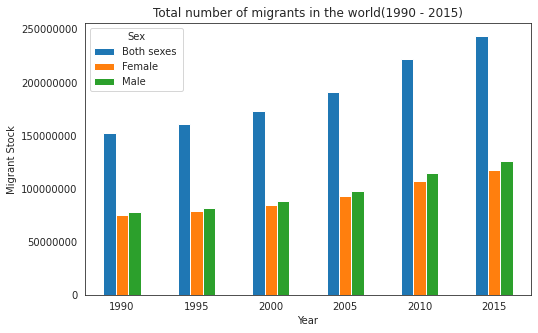

In [40]:
#create the bar chart diagram 
world2.plot(kind='bar', figsize=(8,5), x='Year',
              title='Total number of migrants in the world(1990 - 2015)',ylabel="Migrant Stock",).tick_params(labelrotation=0)
plt.ticklabel_format(style='plain', axis='y')

###2. Multiple Bar chart:  International migrant stock by Continents

In [41]:
#create data frame with each continent data
compare_c = intms_tidy1.loc[(intms_tidy1.Area== 'Asia') | (intms_tidy1.Area=='Northern America') | (intms_tidy1.Area=='Europe')| (intms_tidy1.Area=='Africa')| (intms_tidy1.Area=='Latin America and the Caribbean')| (intms_tidy1.Area=='Oceania')]

#drop unnecessary columns
compare_c= compare_c[compare_c.columns[1:4]]
compare_c.head(20)


Sex,Year,Area,Both sexes
36,1990,Africa,15690623.0
37,1995,Africa,16352814.0
38,2000,Africa,14800306.0
39,2005,Africa,15191146.0
40,2010,Africa,16840014.0
41,2015,Africa,20649557.0
416,1990,Asia,48142261.0
417,1995,Asia,46548225.0
418,2000,Asia,49340815.0
419,2005,Asia,53371224.0


In [42]:
#make a pivot table to make year into individual columns
compare_c_p = compare_c.pivot_table(
  index = 'Area',
  columns = 'Year', aggfunc='first').reset_index()

compare_c_p.head(20)

Sex                              Area Both sexes                           \
Year                                         1990        1995        2000   
0                              Africa  15690623.0  16352814.0  14800306.0   
1                                Asia  48142261.0  46548225.0  49340815.0   
2                              Europe  49219200.0  52842663.0  56271885.0   
3     Latin America and the Caribbean   7169728.0   6694640.0   6578428.0   
4                    Northern America  27610542.0  33341147.0  40351848.0   
5                             Oceania   4730858.0   5022263.0   5360027.0   

Sex                                       
Year        2005        2010        2015  
0     15191146.0  16840014.0  20649557.0  
1     53371224.0  65914319.0  75081125.0  
2     64086824.0  72374755.0  76145954.0  
3      7233098.0   8238795.0   9233989.0  
4     45363387.0  51220996.0  54488725.0  
5      6023421.0   7125364.0   8100886.0

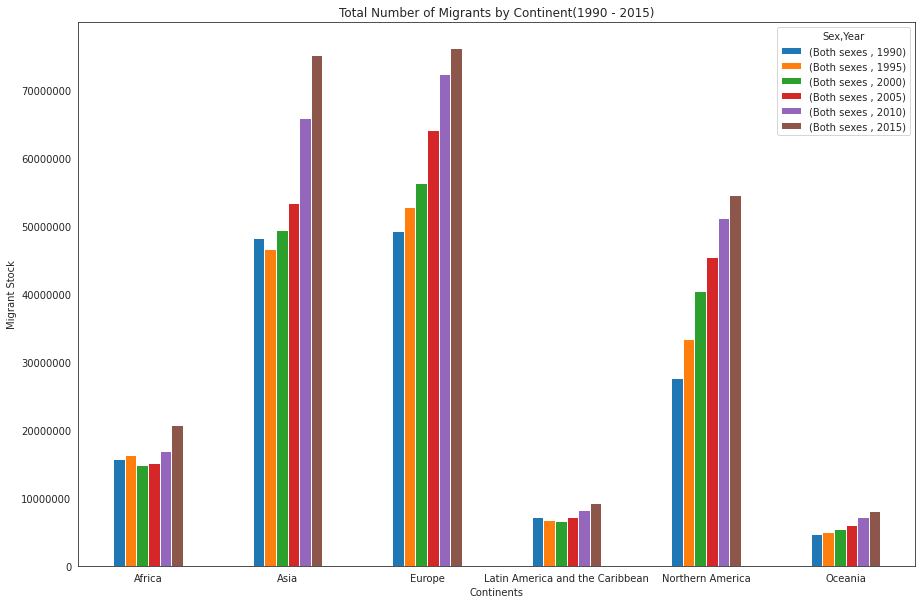

In [43]:
#plot compare international migration by continents
compare_c_p.plot(kind='bar', figsize=(15,10), x='Area',xlabel="Continents",ylabel="Migrant Stock",
              title='Total Number of Migrants by Continent(1990 - 2015)').tick_params(labelrotation=0)
plt.ticklabel_format(style='plain', axis='y')


### 3. Multiple Bar Chart: Total number of Migration by Region Developments


In [44]:
#create dataframe with developed regions and developing regions data
compare_d = intms_tidy1.loc[(intms_tidy1.Area== 'Developed regions') | (intms_tidy1.Area=='Developing regions')]

#drop unnecessary columns 
compare_d= compare_d[compare_d.columns[1:4]]
compare_d.head(20)

#create a pivot table to make year into individual columns
compare_d_p = compare_d.pivot_table(
  index = 'Area',
  columns = 'Year', aggfunc='first').reset_index()

compare_d_p.head(20)

Sex                 Area Both sexes                                         \
Year                            1990        1995         2000         2005   
0      Developed regions  82378628.0  92306854.0  103375363.0  117181109.0   
1     Developing regions  70184584.0  68494898.0   69327946.0   74087991.0   

Sex                             
Year         2010         2015  
0     132560325.0  140481955.0  
1      89153918.0  103218281.0

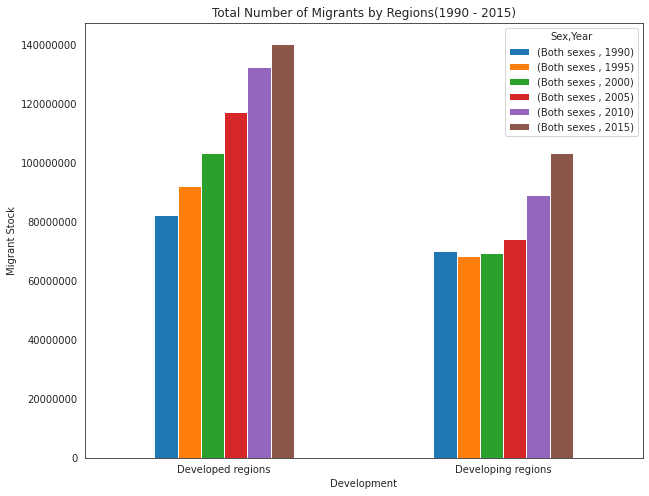

In [45]:
#create the multiple bar charts for development regions 
compare_d_p.plot(kind='bar', figsize=(10,8), x='Area',xlabel="Development",ylabel="Migrant Stock",
              title='Total Number of Migrants by Regions(1990 - 2015)').tick_params(labelrotation=0)
plt.ticklabel_format(style='plain', axis='y')


### 4.Small multiples of Lineplots: by continent & world 

In [46]:
compare_t = intms_melt1.loc[(intms_melt1.Area== 'Asia') | (intms_melt1.Area=='Europe')| (intms_melt1.Area=='Africa')| (intms_melt1.Area=='Latin America and the Caribbean')| (intms_melt1.Area=='Oceania')]
compare_t= compare_t[compare_t.columns[1:5]].reset_index()
compare_t.head(20)


,index,Area,International migrant stock,Sex,Year
0,6,Africa,15690623.0,Both sexes,1990
1,70,Asia,48142261.0,Both sexes,1990
2,126,Europe,49219200.0,Both sexes,1990
3,179,Latin America and the Caribbean,7169728.0,Both sexes,1990
4,237,Oceania,4730858.0,Both sexes,1990
5,271,Africa,16352814.0,Both sexes,1995
6,335,Asia,46548225.0,Both sexes,1995
7,391,Europe,52842663.0,Both sexes,1995
8,444,Latin America and the Caribbean,6694640.0,Both sexes,1995
9,502,Oceania,5022263.0,Both sexes,1995


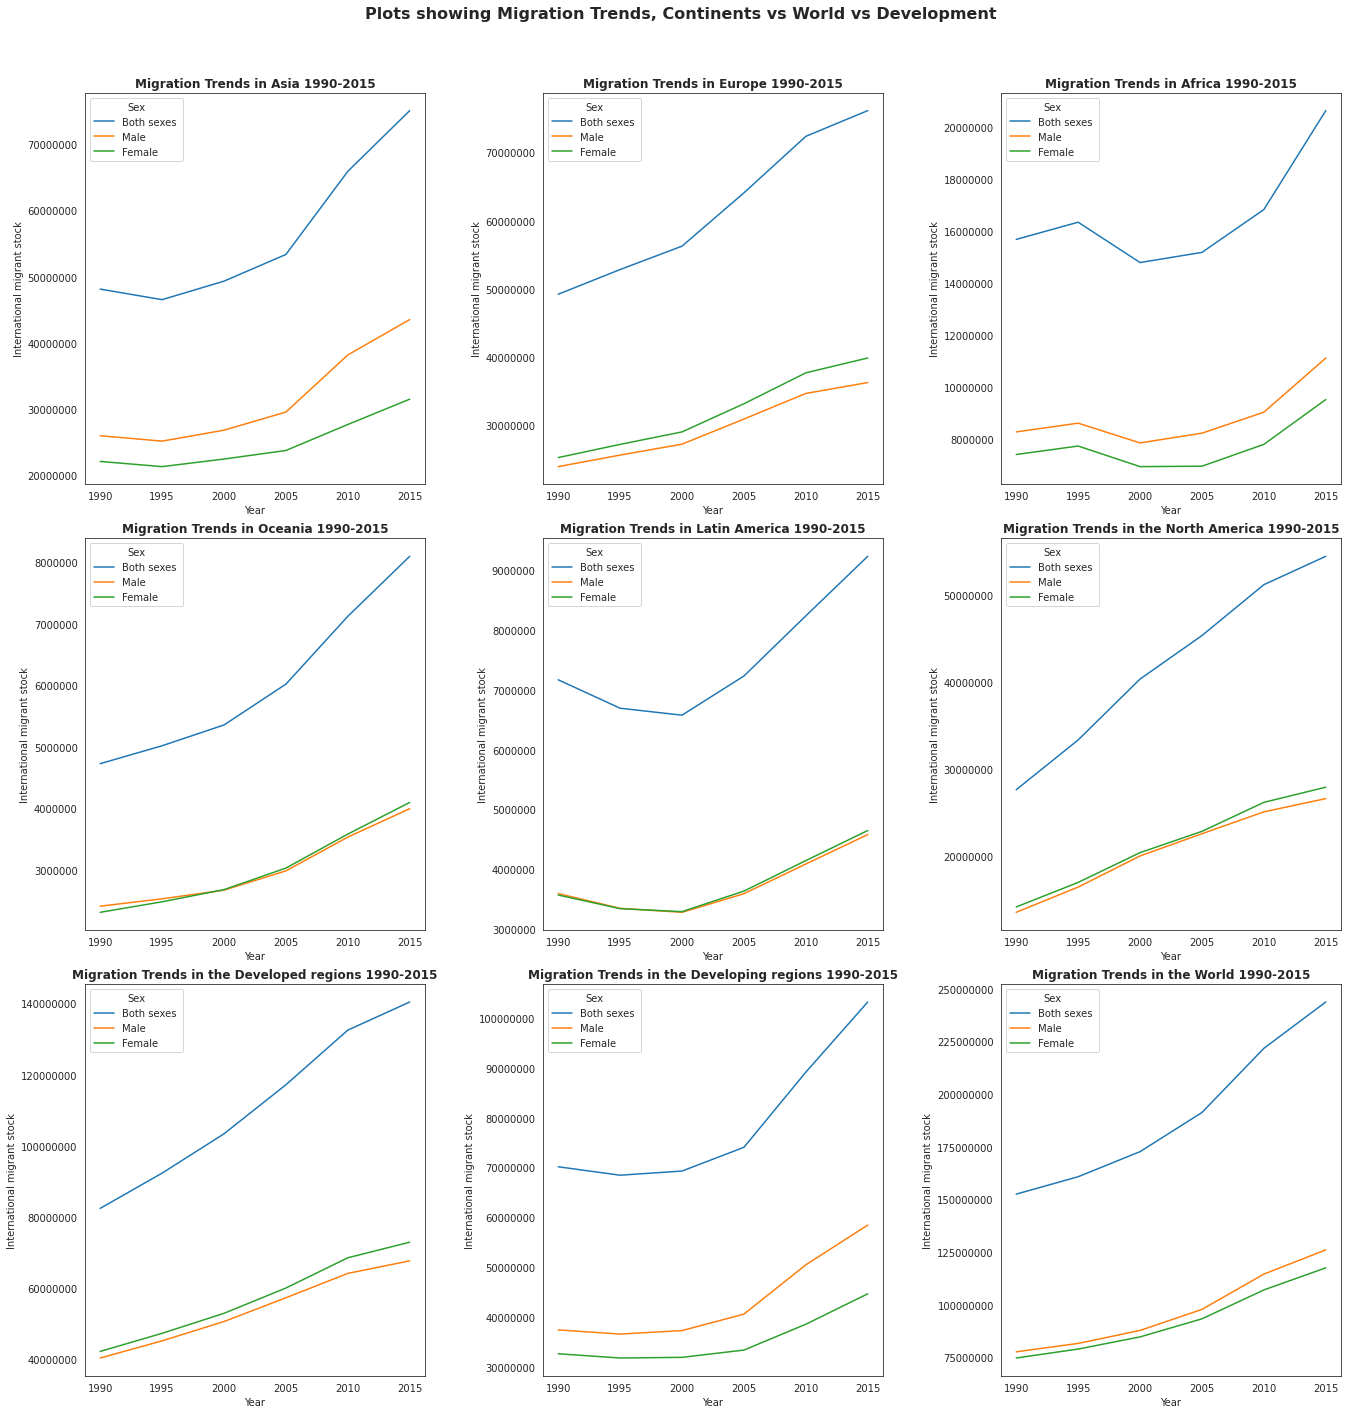

In [47]:
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_style('white')

#create small multiples
fig, ax = plt.subplots(3, 3, figsize=(19,20))
fig.suptitle('Plots showing Migration Trends, Continents vs World vs Development',fontweight='bold',fontsize=16)


#create data frames for each continent, developement region, and the world
area_asia = intms_melt1.loc[(intms_melt1.Area== 'Asia')]
area_eur = intms_melt1.loc[(intms_melt1.Area== 'Europe')]
area_afr= intms_melt1.loc[(intms_melt1.Area== 'Africa')]
area_am = intms_melt1.loc[(intms_melt1.Area== 'Latin America and the Caribbean')]
area_oce = intms_melt1.loc[(intms_melt1.Area== 'Oceania')]
area_world = intms_melt1.loc[(intms_melt1.Area== 'WORLD')]
area_ded = intms_melt1.loc[(intms_melt1.Area== 'Developed regions')]
area_ding = intms_melt1.loc[(intms_melt1.Area== 'Developing regions')]
area_na = intms_melt1.loc[(intms_melt1.Area== 'Northern America')]

#draw the line plots
ax[0,0].set_title('Migration Trends in Asia 1990-2015',fontweight="bold")
sns.lineplot(y="International migrant stock", x="Year", hue="Sex",ci=None, data=area_asia.reset_index(), ax=ax[0,0])
ax[0,0].ticklabel_format(style='plain', axis='y')

ax[0,1].set_title('Migration Trends in Europe 1990-2015',fontweight="bold")
sns.lineplot(y="International migrant stock", x="Year", hue="Sex",ci=None, data=area_eur.reset_index(), ax=ax[0,1])
ax[0,1].ticklabel_format(style='plain', axis='y')

ax[0,2].set_title('Migration Trends in Africa 1990-2015',fontweight="bold")
sns.lineplot(y="International migrant stock", x="Year", hue="Sex",ci=None, data=area_afr.reset_index(), ax=ax[0,2])
ax[0,2].ticklabel_format(style='plain', axis='y')

ax[1,1].set_title('Migration Trends in Latin America 1990-2015',fontweight="bold")
sns.lineplot(y="International migrant stock", x="Year", hue="Sex",ci=None, data=area_am.reset_index(), ax=ax[1,1])
ax[1,1].ticklabel_format(style='plain', axis='y')

ax[1,0].set_title('Migration Trends in Oceania 1990-2015',fontweight="bold")
sns.lineplot(y="International migrant stock", x="Year", hue="Sex",ci=None, data=area_oce.reset_index(), ax=ax[1,0])
ax[1,0].ticklabel_format(style='plain', axis='y')

ax[1,2].set_title('Migration Trends in the North America 1990-2015',fontweight="bold")
sns.lineplot(y="International migrant stock", x="Year", hue="Sex",ci=None, data=area_na.reset_index(), ax=ax[1,2])
ax[1,2].ticklabel_format(style='plain', axis='y')

ax[2,2].set_title('Migration Trends in the World 1990-2015',fontweight="bold")
sns.lineplot(y="International migrant stock", x="Year", hue="Sex",ci=None, data=area_world.reset_index(), ax=ax[2,2])
ax[2,2].ticklabel_format(style='plain', axis='y')

ax[2,0].set_title('Migration Trends in the Developed regions 1990-2015',fontweight="bold")
sns.lineplot(y="International migrant stock", x="Year", hue="Sex",ci=None, data=area_ded.reset_index(), ax=ax[2,0])
ax[2,0].ticklabel_format(style='plain', axis='y')

ax[2,1].set_title('Migration Trends in the Developing regions 1990-2015',fontweight="bold")
sns.lineplot(y="International migrant stock", x="Year", hue="Sex",ci=None, data=area_ding.reset_index(), ax=ax[2,1])
ax[2,1].ticklabel_format(style='plain', axis='y')


fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()



# Table 2: Total population 

### Load Table 2 and prepare the data

In [73]:
#import libraries
import pandas as pd
import numpy as np

#import raw data and table 2 
population_ims = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 2')
population_ims.head(20)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,Trends in International Migrant Stock: The 201...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,Table 2 - Total population at mid-year by sex...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,POP/DB/MIG/Stock/Rev.2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#Get high level pandas functionalities
population_ims.info()
population_ims.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   266 non-null    object 
 1   Unnamed: 1   266 non-null    object 
 2   Unnamed: 2   27 non-null     object 
 3   Unnamed: 3   266 non-null    object 
 4   Unnamed: 4   275 non-null    object 
 5   Unnamed: 5   266 non-null    float64
 6   Unnamed: 6   266 non-null    float64
 7   Unnamed: 7   266 non-null    float64
 8   Unnamed: 8   266 non-null    float64
 9   Unnamed: 9   266 non-null    float64
 10  Unnamed: 10  267 non-null    object 
 11  Unnamed: 11  266 non-null    object 
 12  Unnamed: 12  266 non-null    object 
 13  Unnamed: 13  266 non-null    object 
 14  Unnamed: 14  266 non-null    object 
 15  Unnamed: 15  266 non-null    object 
 16  Unnamed: 16  267 non-null    object 
 17  Unnamed: 17  266 non-null    object 
 18  Unnamed: 18  266 non-null    object 
 19  Unnamed:

,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,1.258989e+05,1.348851e+05,1.439586e+05,1.534588e+05,1.632653e+05
std,5.765327e+05,6.178521e+05,6.589245e+05,7.012766e+05,7.447428e+05
min,7.810000e-01,7.870000e-01,7.980000e-01,7.990000e-01,8.000000e-01
25%,4.464555e+02,4.848070e+02,4.948442e+02,5.282893e+02,5.845947e+02
50%,5.170379e+03,5.358465e+03,5.798518e+03,6.454381e+03,7.218885e+03
75%,2.377035e+04,2.556571e+04,2.793441e+04,3.179784e+04,3.554932e+04
max,5.735123e+06,6.126622e+06,6.519636e+06,6.929725e+06,7.349472e+06


In [75]:
# get the size of the dataframe
population_ims.shape

(280, 22)

In [76]:
#Drop the description section and set up column names
population_ims= population_ims[population_ims.columns[0:22]].iloc[14:280]
population_ims1= pd.DataFrame(population_ims)
#Set the first column as the headers
population_ims1.columns = population_ims1.iloc[0]
population_ims1 = population_ims.reindex(population_ims1.index.drop(14))
population_ims1.head()




14,NaN,NaN,NaN,NaN,1990.0,1995.0,2000.0,2005.0,2010.0,2015.0,...,2000.0,2005.0,2010.0,2015.0,1990.0,1995.0,2000.0,2005.0,2010.0,2015.0
15,1,WORLD,NaN,900,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,...,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
16,2,Developed regions,(b),901,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,...,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
17,3,Developing regions,(c),902,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,...,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
18,4,Least developed countries,(d),941,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,...,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
19,5,Less developed regions excluding least develop...,NaN,934,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,...,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783


In [77]:
#rename columns
population_ims1.columns=['ID','Area','Notes','Country Code','Both sexes 1990','Both sexes 1995',
                 'Both sexes 2000', 'Both sexes 2005','Both sexes 2010',
                 'Both sexes 2015', 'Male 1990', 'Male 1995', 'Male 2000', 'Male 2005',    
                 'Male 2010', 'Male 2015', 'Female 1990', 'Female 1995', 'Female 2000',  
                 'Female 2005', 'Female 2010', 'Female 2015']

#drop "notes" and "country code" as they are not necessary 
#population_ims2 = population_ims1.drop(['Notes','Country Code'], axis=1)
population_ims2 = population_ims1.drop(['Notes','Country Code','Both sexes 1990','Both sexes 1995',
                 'Both sexes 2000', 'Both sexes 2005','Both sexes 2010',
                 'Both sexes 2015'], axis=1)


population_ims2.head()

,ID,Area,Male 1990,Male 1995,Male 2000,Male 2005,Male 2010,Male 2015,Female 1990,Female 1995,Female 2000,Female 2005,Female 2010,Female 2015
15,1,WORLD,2670423.701,2886635.893,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
16,2,Developed regions,555255.626,568268.456,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
17,3,Developing regions,2115168.075,2318367.437,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
18,4,Least developed countries,254042.556,292026.742,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
19,5,Less developed regions excluding least develop...,1861125.519,2026340.695,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783


Problem 1: Column names ("1990", "1995") are values not variable names
Tidy data principle 1: Column names need to be informative, variable names are not values

In [78]:
#unpivot measured variables to row axis
population_melt = pd.melt(population_ims2, id_vars =["ID", "Area"] , var_name = "SexYear", value_name = "Total Population")
population_melt.head()

,ID,Area,SexYear,Total Population
0,1,WORLD,Male 1990,2670423.701
1,2,Developed regions,Male 1990,555255.626
2,3,Developing regions,Male 1990,2115168.075
3,4,Least developed countries,Male 1990,254042.556
4,5,Less developed regions excluding least develop...,Male 1990,1861125.519


Problem 2: There are multiple variables stored in 1 column (Sex & Year)
Tidy data principle 2: Each column needs to consist of one and only one variable

In [79]:
#Sex and Year share one cell, they should be separate columns 
population_melt1=(population_melt.assign(Sex = lambda x: x.SexYear.str[:-4].astype(str), Year = lambda x: x.SexYear.str[-4:].astype(str)).drop("SexYear",axis=1))


#replace ".." with NaN
population_melt1.replace('..', np.nan, inplace=True)


population_melt1['Year']=population_melt1['Year'].astype(int)

population_melt1.info()

population_melt1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3180 non-null   int64  
 1   Area              3180 non-null   object 
 2   Total Population  2796 non-null   float64
 3   Sex               3180 non-null   object 
 4   Year              3180 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 124.3+ KB


,ID,Area,Total Population,Sex,Year
0,1,WORLD,2670423.701,Male,1990
1,2,Developed regions,555255.626,Male,1990
2,3,Developing regions,2115168.075,Male,1990
3,4,Least developed countries,254042.556,Male,1990
4,5,Less developed regions excluding least develop...,1861125.519,Male,1990
...,...,...,...,...,...
3175,261,Samoa,93.584,Female,2015
3176,262,Tokelau,NaN,Female,2015
3177,263,Tonga,52.931,Female,2015
3178,264,Tuvalu,NaN,Female,2015


### 5. Line charts: world population by gender (1990-2015)

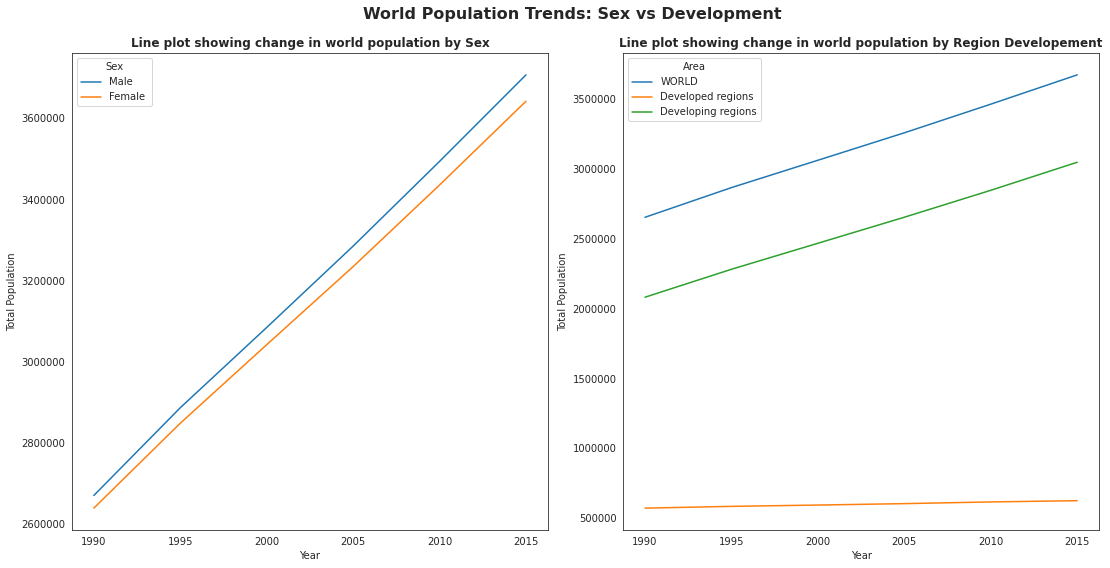

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import pandas as pd
import plotly.express as px

total_world = population_melt1.loc[ (population_melt1.Area=='WORLD')]
total_wdd= population_melt1.loc[(population_melt1.Area== 'WORLD')|(population_melt1.Area== 'Developed regions')|(population_melt1.Area== 'Developing regions')]

sns.set_style('white')

f, ax = plt.subplots(1, 2, figsize=(16,8))
f.suptitle('World Population Trends: Sex vs Development',fontweight='bold',fontsize=16)


ax[0].set_title('Line plot showing change in world population by Sex',fontweight="bold")
sns.lineplot(y="Total Population", x="Year", hue="Sex",ci=None, data=total_world,ax=ax[0])
ax[0].ticklabel_format(style='plain', axis='y')



ax[1].set_title('Line plot showing change in world population by Region Developement',fontweight="bold")
sns.lineplot(y="Total Population", x="Year", hue="Area",ci=None, data=total_wdd,ax=ax[1])
ax[1].ticklabel_format(style='plain', axis='y')



f.tight_layout()
f.subplots_adjust(top=.90)
plt.show()



# Table 3:  International migrant stock as a percentage of the total population 

### Load Table 3 and prepare the data

In [97]:
#import libraries
import pandas as pd
import numpy as np

#import raw data and table 3 
ims_percentage = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 3')
ims_percentage.head(20)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,Trends in International Migrant Stock: The 201...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,Table 3 - International migrant stock as a per...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,POP/DB/MIG/Stock/Rev.2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
#Get high level pandas functionalities
ims_percentage.info()
ims_percentage.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   266 non-null    object 
 1   Unnamed: 1   266 non-null    object 
 2   Unnamed: 2   27 non-null     object 
 3   Unnamed: 3   266 non-null    object 
 4   Unnamed: 4   241 non-null    object 
 5   Unnamed: 5   267 non-null    object 
 6   Unnamed: 6   266 non-null    object 
 7   Unnamed: 7   266 non-null    object 
 8   Unnamed: 8   266 non-null    object 
 9   Unnamed: 9   266 non-null    float64
 10  Unnamed: 10  266 non-null    float64
 11  Unnamed: 11  267 non-null    object 
 12  Unnamed: 12  266 non-null    object 
 13  Unnamed: 13  266 non-null    object 
 14  Unnamed: 14  266 non-null    object 
 15  Unnamed: 15  266 non-null    object 
 16  Unnamed: 16  266 non-null    object 
 17  Unnamed: 17  267 non-null    object 
 18  Unnamed: 18  266 non-null    object 
 19  Unnamed:

,Unnamed: 9,Unnamed: 10
count,266.000000,266.000000
mean,19.795613,20.103450
std,123.669558,123.966384
min,0.063377,0.071076
25%,1.555673,1.472722
50%,4.495284,4.767713
75%,14.866569,15.243307
max,2010.000000,2015.000000


In [99]:
# get the size of the dataframe
ims_percentage.shape

(280, 23)

In [100]:
#Drop the description section and set up column names
ims_percentage1= ims_percentage[ims_percentage.columns[0:23]].iloc[14:280]
ims_percentage1= pd.DataFrame(ims_percentage1)
#Set the first column as the headers
ims_percentage1.columns = ims_percentage1.iloc[0]
ims_percentage1 = ims_percentage1.reindex(ims_percentage1.index.drop(14))
ims_percentage1.head()


14,NaN,NaN,NaN,NaN,NaN,1990.0,1995.0,2000.0,2005.0,2010.0,...,2000.0,2005.0,2010.0,2015.0,1990.0,1995.0,2000.0,2005.0,2010.0,2015.0
15,1,WORLD,NaN,900,NaN,2.87331,2.803806,2.818899,2.933739,3.199467,...,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
16,2,Developed regions,(b),901,NaN,7.198015,7.891085,8.695688,9.693045,10.747765,...,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
17,3,Developing regions,(c),902,NaN,1.685021,1.500317,1.404022,1.395066,1.565106,...,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
18,4,Least developed countries,(d),941,NaN,2.171513,2.001353,1.516863,1.303078,1.182422,...,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
19,5,Less developed regions excluding least develop...,NaN,934,NaN,1.617042,1.426534,1.386338,1.410133,1.631865,...,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397


In [101]:
#rename columns
ims_percentage1.columns=['ID','Area','Notes','Country Code','Type of Data','Both sexes 1990','Both sexes 1995',
                 'Both sexes 2000', 'Both sexes 2005','Both sexes 2010',
                 'Both sexes 2015', 'Male 1990', 'Male 1995', 'Male 2000', 'Male 2005',    
                 'Male 2010', 'Male 2015', 'Female 1990', 'Female 1995', 'Female 2000',  
                 'Female 2005', 'Female 2010', 'Female 2015']

#drop "notes" and "country code" as they are not necessary 
ims_percentage2 = ims_percentage1.drop(['Notes','Country Code','Type of Data'], axis=1)

ims_percentage2.head()


,ID,Area,Both sexes 1990,Both sexes 1995,Both sexes 2000,Both sexes 2005,Both sexes 2010,Both sexes 2015,Male 1990,Male 1995,Male 2000,Male 2005,Male 2010,Male 2015,Female 1990,Female 1995,Female 2000,Female 2005,Female 2010,Female 2015
15,1,WORLD,2.87331,2.803806,2.818899,2.933739,3.199467,3.315888,2.91143,2.831583,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
16,2,Developed regions,7.198015,7.891085,8.695688,9.693045,10.747765,11.226422,7.251326,7.935123,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
17,3,Developing regions,1.685021,1.500317,1.404022,1.395066,1.565106,1.692624,1.772158,1.580624,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
18,4,Least developed countries,2.171513,2.001353,1.516863,1.303078,1.182422,1.252551,2.30005,2.103476,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
19,5,Less developed regions excluding least develop...,1.617042,1.426534,1.386338,1.410133,1.631865,1.774158,1.700101,1.505273,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397


Problem 1: Column names ("1990", "1995") are values not variable names
Tidy data principle 1: Column names need to be informative, variable names and not values

In [102]:
#unpivot measured variables to row axis
imsp_melt = pd.melt(ims_percentage2, id_vars =["ID", "Area"] , var_name = "SexYear", value_name = "Percentage")
imsp_melt.head()

,ID,Area,SexYear,Percentage
0,1,WORLD,Both sexes 1990,2.87331
1,2,Developed regions,Both sexes 1990,7.198015
2,3,Developing regions,Both sexes 1990,1.685021
3,4,Least developed countries,Both sexes 1990,2.171513
4,5,Less developed regions excluding least develop...,Both sexes 1990,1.617042


Problem 2: There are multiple variables stored in 1 column (Sex & Year)
Tidy data principle 2: Each column needs to consist of one and only one variable

In [103]:
#Sex and Year share one cell, they should be separate columns 
imsp_melt1=(imsp_melt.assign(Sex = lambda x: x.SexYear.str[:-4].astype(str), Year = lambda x: x.SexYear.str[-4:].astype(str)).drop("SexYear",axis=1))

imsp_melt1.head()

,ID,Area,Percentage,Sex,Year
0,1,WORLD,2.87331,Both sexes,1990
1,2,Developed regions,7.198015,Both sexes,1990
2,3,Developing regions,1.685021,Both sexes,1990
3,4,Least developed countries,2.171513,Both sexes,1990
4,5,Less developed regions excluding least develop...,1.617042,Both sexes,1990


In [104]:
group= imsp_melt1.groupby('Sex')
group.count()

imsp_melt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770 entries, 0 to 4769
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          4770 non-null   object
 1   Area        4770 non-null   object
 2   Percentage  4770 non-null   object
 3   Sex         4770 non-null   object
 4   Year        4770 non-null   object
dtypes: object(5)
memory usage: 186.5+ KB


In [105]:
imsp_melt1.replace('..', np.nan, inplace=True)
imsp_melt1['Percentage']=imsp_melt1['Percentage'].astype(float)
imsp_melt1['Year']=imsp_melt1['Year'].astype(int)

group['Percentage'].agg(['max', 'min', 'mean'])
imsp_melt1

,ID,Area,Percentage,Sex,Year
0,1,WORLD,2.873310,Both sexes,1990
1,2,Developed regions,7.198015,Both sexes,1990
2,3,Developing regions,1.685021,Both sexes,1990
3,4,Least developed countries,2.171513,Both sexes,1990
4,5,Less developed regions excluding least develop...,1.617042,Both sexes,1990
...,...,...,...,...,...
4765,261,Samoa,2.628654,Female,2015
4766,262,Tokelau,NaN,Female,2015
4767,263,Tonga,4.919612,Female,2015
4768,264,Tuvalu,NaN,Female,2015


### 6. Violin Plot: International migrant stock as a percentage of the total population by gender 

In [106]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.express as px

#create a dataframe with only developed and developing (they already present the entire world population)
perc_world= imsp_melt1.loc[(imsp_melt1.Area== 'Developed regions')|(imsp_melt1.Area== 'Developing regions')]

#only keep female and male, remove Both sexes so we can create a split violin chart 
perc_world= perc_world[perc_world.columns[0:5]].iloc[12:36]

perc_world

,ID,Area,Percentage,Sex,Year
1591,2,Developed regions,7.251326,Male,1990
1592,3,Developing regions,1.772158,Male,1990
1856,2,Developed regions,7.935123,Male,1995
1857,3,Developing regions,1.580624,Male,1995
2121,2,Developed regions,8.743236,Male,2000
2122,3,Developing regions,1.490031,Male,2000
2386,2,Developed regions,9.731540,Male,2005
2387,3,Developing regions,1.507122,Male,2005
2651,2,Developed regions,10.680972,Male,2010
2652,3,Developing regions,1.746117,Male,2010


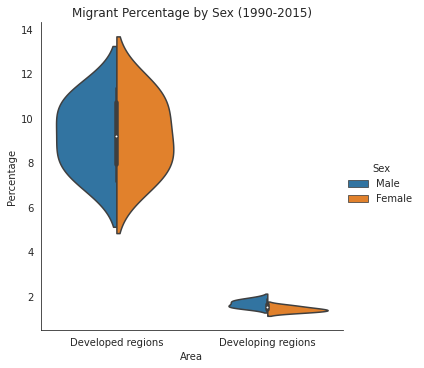

In [115]:
sns.set_style('white')

#create the violin chart
sns.catplot(data=perc_world, kind="violin", x="Area", y="Percentage", hue="Sex", split="True").set(title='Migrant Percentage by Sex (1990-2015)')
plt.ticklabel_format(style='plain', axis='y')

plt.show() 

#Table 4: Female migrants as a percentage of the international migrant stock


###Load table 4 and prepare the data 

In [116]:
#import libraries
import pandas as pd
import numpy as np

#import raw data and table 4 
missing_values = ['..'] # define missing values 
df_female = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 4', na_values = missing_values)
df_female.head(20)



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,Trends in International Migrant Stock: The 201...,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,Table 4 - Female migrants as a percentage of t...,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,POP/DB/MIG/Stock/Rev.2015,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
#Get high level pandas functionalities
df_female.info()
df_female.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   266 non-null    object 
 1   Unnamed: 1   266 non-null    object 
 2   Unnamed: 2   27 non-null     object 
 3   Unnamed: 3   266 non-null    object 
 4   Unnamed: 4   241 non-null    object 
 5   Unnamed: 5   263 non-null    object 
 6   Unnamed: 6   262 non-null    float64
 7   Unnamed: 7   262 non-null    float64
 8   Unnamed: 8   263 non-null    float64
 9   Unnamed: 9   266 non-null    float64
 10  Unnamed: 10  266 non-null    float64
dtypes: float64(5), object(6)
memory usage: 24.2+ KB


,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
count,262.000000,262.000000,263.000000,266.000000,266.000000
mean,55.857045,56.004701,55.668023,55.597419,55.683104
std,120.411311,120.723619,120.837977,120.488473,120.793807
min,13.858366,13.859552,13.628353,13.458551,13.325719
25%,46.519688,46.227674,45.887502,45.872356,45.881610
50%,48.945826,49.202604,49.100750,49.274357,49.427732
75%,51.714282,52.001573,52.095902,51.979357,52.089893
max,1995.000000,2000.000000,2005.000000,2010.000000,2015.000000


In [118]:
# get the size of the dataframe
df_female.shape

(280, 11)

In [119]:
#Drop the description section
df_female= df_female[df_female.columns[0:11]].iloc[14:280]
df_female1= pd.DataFrame(df_female)
#Set the first column as the headers
df_female1.columns = df_female1.iloc[0]
df_female1 = df_female1.reindex(df_female1.index.drop(14))
df_female1.head()


14,NaN,NaN,NaN,NaN,NaN,1990.0,1995.0,2000.0,2005.0,2010.0,2015.0
15,1,WORLD,NaN,900,NaN,49.03915,49.168790,49.112244,48.832993,48.305660,48.249769
16,2,Developed regions,(b),901,NaN,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
17,3,Developing regions,(c),902,NaN,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
18,4,Least developed countries,(d),941,NaN,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752
19,5,Less developed regions excluding least develop...,NaN,934,NaN,46.466684,46.279022,46.009598,45.130768,43.043672,42.984398


In [120]:
#rename columns
df_female1.columns=['ID','Area','Notes','Country Code','Type of data (a)','1990', '1995', '2000',  
                 '2005', '2010', '2015']

#drop "notes" and "country code" as they are not necessary 
df_female2 = df_female1.drop(['Notes','Country Code','Type of data (a)'], axis=1)

df_female2.head()

,ID,Area,1990,1995,2000,2005,2010,2015
15,1,WORLD,49.03915,49.168790,49.112244,48.832993,48.305660,48.249769
16,2,Developed regions,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
17,3,Developing regions,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
18,4,Least developed countries,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752
19,5,Less developed regions excluding least develop...,46.466684,46.279022,46.009598,45.130768,43.043672,42.984398



Tidy data principle 1:Column names ("1990", "1995") are values not variable names Column names need to be informative, variable names are not values

In [121]:
#unpivot measured variables to row axis
df_female3 = pd.melt(df_female2, id_vars =["ID", "Area"] , var_name = "Year", value_name = "Female Stock Percentage")
df_female3.head()


,ID,Area,Year,Female Stock Percentage
0,1,WORLD,1990,49.03915
1,2,Developed regions,1990,51.123977
2,3,Developing regions,1990,46.592099
3,4,Least developed countries,1990,47.261155
4,5,Less developed regions excluding least develop...,1990,46.466684


In [122]:
#reorder the dataset
df_female4= df_female3.sort_values(by =['ID', 'Year'] )
#df_female4 = df_female4.set_index(['ID','Year'])

#The dataset is tidy now
df_female4 

,ID,Area,Year,Female Stock Percentage
0,1,WORLD,1990,49.03915
265,1,WORLD,1995,49.16879
530,1,WORLD,2000,49.112244
795,1,WORLD,2005,48.832993
1060,1,WORLD,2010,48.30566
...,...,...,...,...
529,265,Wallis and Futuna Islands,1995,48.869048
794,265,Wallis and Futuna Islands,2000,49.478908
1059,265,Wallis and Futuna Islands,2005,49.513742
1324,265,Wallis and Futuna Islands,2010,49.5317


In [123]:
df_female4["Female Stock Percentage"]=df_female4["Female Stock Percentage"].astype(float)
df_female4["Year"]=df_female4["Year"].astype(int)

In [124]:
df_female4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 0 to 1589
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1590 non-null   object 
 1   Area                     1590 non-null   object 
 2   Year                     1590 non-null   int64  
 3   Female Stock Percentage  1575 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 62.1+ KB


In [125]:
female_world = df_female4.loc[(df_female4.Area== 'WORLD')]
female_world

,ID,Area,Year,Female Stock Percentage
0,1,WORLD,1990,49.039150
265,1,WORLD,1995,49.168790
530,1,WORLD,2000,49.112244
795,1,WORLD,2005,48.832993
1060,1,WORLD,2010,48.305660
1325,1,WORLD,2015,48.249769


###7. Small multiple: linechart: Female migration trends by continent and world  

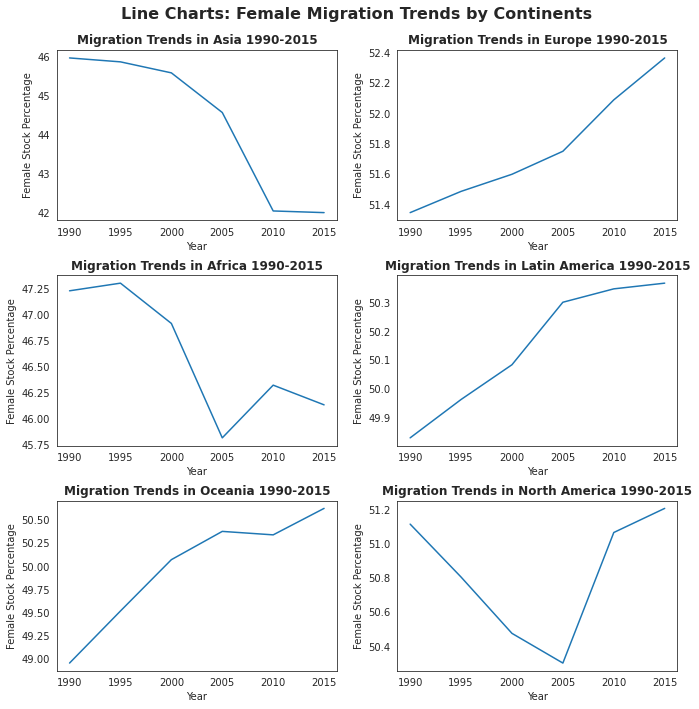

In [126]:
#load libraries
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.express as px

sns.set_style('white')

#create small multiple 
f, ax = plt.subplots(3, 2, figsize=(10,10))
f.suptitle('Line Charts: Female Migration Trends by Continents',fontweight='bold',fontsize=16)

#create individual dataframes for each continent
female_asia = df_female4.loc[(df_female4.Area== 'Asia')]
female_eur = df_female4.loc[(df_female4.Area== 'Europe')]
female_afr= df_female4.loc[(df_female4.Area== 'Africa')]
female_am = df_female4.loc[(df_female4.Area== 'Latin America and the Caribbean')]
female_oce = df_female4.loc[(df_female4.Area== 'Oceania')]
female_na = df_female4.loc[(df_female4.Area== 'Northern America')]

#create small multiple line charts presenting female migration percentage across continents
ax[0,0].set_title('Migration Trends in Asia 1990-2015',fontweight="bold")
sns.lineplot(y="Female Stock Percentage", x="Year", data=female_asia.reset_index(), ax=ax[0,0])
ax[0,0].ticklabel_format(style='plain', axis='y')

ax[0,1].set_title('Migration Trends in Europe 1990-2015',fontweight="bold")
sns.lineplot(y="Female Stock Percentage", x="Year",  data=female_eur.reset_index(), ax=ax[0,1])
ax[0,1].ticklabel_format(style='plain', axis='y')

ax[1,0].set_title('Migration Trends in Africa 1990-2015',fontweight="bold")
sns.lineplot(y="Female Stock Percentage", x="Year", data=female_afr.reset_index(), ax=ax[1,0])
ax[1,0].ticklabel_format(style='plain', axis='y')

ax[1,1].set_title('Migration Trends in Latin America 1990-2015',fontweight="bold")
sns.lineplot(y="Female Stock Percentage", x="Year",data=female_am.reset_index(), ax=ax[1,1])
ax[1,1].ticklabel_format(style='plain', axis='y')

ax[2,0].set_title('Migration Trends in Oceania 1990-2015',fontweight="bold")
sns.lineplot(y="Female Stock Percentage", x="Year", data=female_oce.reset_index(), ax=ax[2,0])
ax[2,0].ticklabel_format(style='plain', axis='y')

ax[2,1].set_title('Migration Trends in North America 1990-2015',fontweight="bold")
sns.lineplot(y="Female Stock Percentage", x="Year", data=female_na.reset_index(), ax=ax[2,1])
ax[2,1].ticklabel_format(style='plain', axis='y')

f.tight_layout()
f.subplots_adjust(top=.92)
plt.show()

###8. female migration as a percentage (adjusted y-axis) 

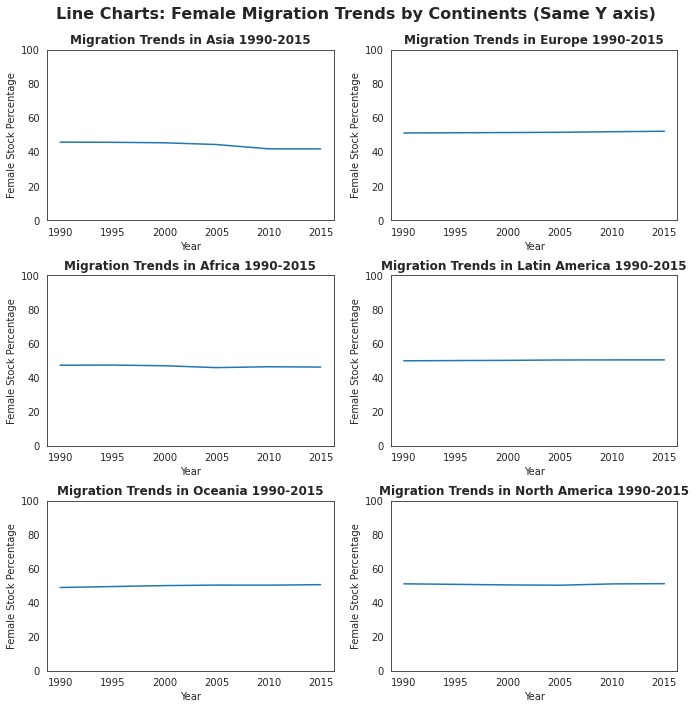

In [129]:
#Make all plots using the same y-axis value

sns.set_style('white')

f, ax = plt.subplots(3, 2, figsize=(10,10))
f.suptitle('Line Charts: Female Migration Trends by Continents (Same Y axis)',fontweight='bold',fontsize=16)

#set the y-axis from 0 to 100 which represent the percentage 
ylim = (0, 100)

#create the plots 
ax[0,0].set_title('Migration Trends in Asia 1990-2015',fontweight="bold")
sns.lineplot(y="Female Stock Percentage", x="Year", data=female_asia.reset_index(), ax=ax[0,0]).set_ylim(ylim)
ax[0,0].ticklabel_format(style='plain', axis='y')

ax[0,1].set_title('Migration Trends in Europe 1990-2015',fontweight="bold")
sns.lineplot(y="Female Stock Percentage", x="Year",  data=female_eur.reset_index(), ax=ax[0,1]).set_ylim(ylim)
ax[0,1].ticklabel_format(style='plain', axis='y')


ax[1,0].set_title('Migration Trends in Africa 1990-2015',fontweight="bold")
sns.lineplot(y="Female Stock Percentage", x="Year", data=female_afr.reset_index(), ax=ax[1,0]).set_ylim(ylim)
ax[1,0].ticklabel_format(style='plain', axis='y')


ax[1,1].set_title('Migration Trends in Latin America 1990-2015',fontweight="bold")
sns.lineplot(y="Female Stock Percentage", x="Year",data=female_am.reset_index(), ax=ax[1,1]).set_ylim(ylim)
ax[1,1].ticklabel_format(style='plain', axis='y')

ax[2,0].set_title('Migration Trends in Oceania 1990-2015',fontweight="bold")
sns.lineplot(y="Female Stock Percentage", x="Year", data=female_oce.reset_index(), ax=ax[2,0]).set_ylim(ylim)
ax[2,0].ticklabel_format(style='plain', axis='y')

ax[2,1].set_title('Migration Trends in North America 1990-2015',fontweight="bold")
sns.lineplot(y="Female Stock Percentage", x="Year", data=female_na.reset_index(), ax=ax[2,1]).set_ylim(ylim)
ax[2,1].ticklabel_format(style='plain', axis='y')

f.tight_layout()
f.subplots_adjust(top=.92)
plt.show()

### 9. Line Chart: Female Migration Percentage in the World 

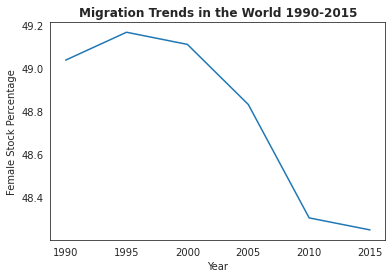

In [128]:
#female migration percentage in the global level 
female_world = df_female4.loc[(df_female4.Area== 'WORLD')]
sns.lineplot(y="Female Stock Percentage", x="Year", data=female_world.reset_index()).set_title('Migration Trends in the World 1990-2015',fontweight="bold")
plt.ticklabel_format(style='plain', axis='y')



# Table 5 : Annual rate of change  

### Load Table 5 and prepare the data

In [130]:
#import libraries
import pandas as pd
import numpy as np

#import raw data and table 5 
arc = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 5')
arc.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,Trends in International Migrant Stock: The 201...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,Table 5 - Annual rate of change of the migrant...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,POP/DB/MIG/Stock/Rev.2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
#Get high level pandas functionalities
arc.info()
arc.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   266 non-null    object
 1   Unnamed: 1   266 non-null    object
 2   Unnamed: 2   27 non-null     object
 3   Unnamed: 3   266 non-null    object
 4   Unnamed: 4   241 non-null    object
 5   Unnamed: 5   267 non-null    object
 6   Unnamed: 6   266 non-null    object
 7   Unnamed: 7   266 non-null    object
 8   Unnamed: 8   266 non-null    object
 9   Unnamed: 9   266 non-null    object
 10  Unnamed: 10  267 non-null    object
 11  Unnamed: 11  266 non-null    object
 12  Unnamed: 12  266 non-null    object
 13  Unnamed: 13  266 non-null    object
 14  Unnamed: 14  266 non-null    object
 15  Unnamed: 15  267 non-null    object
 16  Unnamed: 16  266 non-null    object
 17  Unnamed: 17  266 non-null    object
 18  Unnamed: 18  266 non-null    object
 19  Unnamed: 19  266 non-null    

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
count,266,266,27,266,241,267,266,266,266,266,267,266,266,266,266,267,266,266,266,266
unique,266,266,27,266,18,264,263,263,264,266,264,263,263,264,266,264,263,263,264,266
top,Sort\norder,"Major area, region, country or area of destina...",Notes,Country code,B,..,..,..,..,2010-2015,..,..,..,..,2010-2015,..,..,..,..,2010-2015
freq,1,1,1,1,132,4,4,4,3,1,4,4,4,3,1,4,4,4,3,1


In [132]:
# get the size of the dataframe
arc.shape

(280, 20)

In [133]:
#Drop the description section and set up column names
arc1= arc[arc.columns[0:20]].iloc[14:280]
arc1= pd.DataFrame(arc1)
#Set the first column as the headers
arc1.columns = arc1.iloc[0]
arc1 = arc1.reindex(arc1.index.drop(14))
arc1.head()


14,NaN,NaN,NaN,NaN,NaN,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
15,1,WORLD,NaN,900,NaN,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
16,2,Developed regions,(b),901,NaN,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
17,3,Developing regions,(c),902,NaN,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
18,4,Least developed countries,(d),941,NaN,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.72079
19,5,Less developed regions excluding least develop...,NaN,934,NaN,-0.803244,0.850177,1.62934,4.159339,2.852687,-0.733256,0.950231,1.952269,4.90598,2.87349,-0.88418,0.733402,1.243624,3.212358,2.825127


In [134]:
#rename columns
arc1.columns=['ID','Area','Notes','Country Code','Type of Data','Both sexes 1990-1995','Both sexes 1995-2000',
                 'Both sexes 2000-2005', 'Both sexes 2005-2010','Both sexes 2010-2015',
                'Male 1990-1995', 'Male 1995-2000', 'Male 2000-2005', 'Male 2005-2010',    
                 'Male 2010-2015', 'Female 1990-1995', 'Female 1995-2000', 'Female 2000-2005',  
                 'Female 2005-2010', 'Female 2010-2015']

#drop "notes" and "country code" as they are not necessary 
arc2 = arc1.drop(['Notes','Country Code','Type of Data'], axis=1)

arc2.head()


,ID,Area,Both sexes 1990-1995,Both sexes 1995-2000,Both sexes 2000-2005,Both sexes 2005-2010,Both sexes 2010-2015,Male 1990-1995,Male 1995-2000,Male 2000-2005,Male 2005-2010,Male 2010-2015,Female 1990-1995,Female 1995-2000,Female 2000-2005,Female 2005-2010,Female 2010-2015
15,1,WORLD,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
16,2,Developed regions,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
17,3,Developing regions,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
18,4,Least developed countries,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.72079
19,5,Less developed regions excluding least develop...,-0.803244,0.850177,1.62934,4.159339,2.852687,-0.733256,0.950231,1.952269,4.90598,2.87349,-0.88418,0.733402,1.243624,3.212358,2.825127


Problem 1: Column names ("1990", "1995") are values not variable names
Tidy data principle 1: Column names need to be informative, variable names are not values

In [135]:
#unpivot measured variables to row axis
arc_melt = pd.melt(arc2, id_vars =["ID", "Area"] , var_name = "SexYear", value_name = "Annual ROC")
arc_melt.head()

,ID,Area,SexYear,Annual ROC
0,1,WORLD,Both sexes 1990-1995,1.051865
1,2,Developed regions,Both sexes 1990-1995,2.275847
2,3,Developing regions,Both sexes 1990-1995,-0.487389
3,4,Least developed countries,Both sexes 1990-1995,1.118175
4,5,Less developed regions excluding least develop...,Both sexes 1990-1995,-0.803244


Problem 2: There are multiple variables stored in 1 column (Sex & Year)
Tidy data principle 2: Each column needs to consist of one and only one variable

In [136]:
#Sex and Year share one cell, they should be separate columns 
arc_melt1=(arc_melt.assign(Sex = lambda x: x.SexYear.str[:-9].astype(str), Year = lambda x: x.SexYear.str[-9:].astype(str)).drop("SexYear",axis=1))

arc_melt1.head(20)

,ID,Area,Annual ROC,Sex,Year
0,1,WORLD,1.051865,Both sexes,1990-1995
1,2,Developed regions,2.275847,Both sexes,1990-1995
2,3,Developing regions,-0.487389,Both sexes,1990-1995
3,4,Least developed countries,1.118175,Both sexes,1990-1995
4,5,Less developed regions excluding least develop...,-0.803244,Both sexes,1990-1995
5,6,Sub-Saharan Africa,0.845374,Both sexes,1990-1995
6,7,Africa,0.826734,Both sexes,1990-1995
7,8,Eastern Africa,-3.435412,Both sexes,1990-1995
8,9,Burundi,-5.355717,Both sexes,1990-1995
9,10,Comoros,-0.199873,Both sexes,1990-1995


### 10. Line chart: Annual rate of change by Sex 

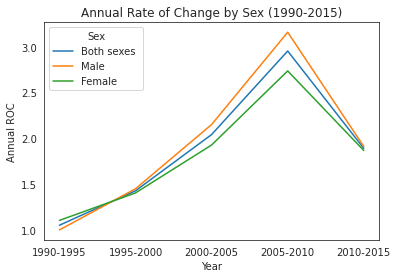

In [137]:
roc_world= arc_melt1.loc[(arc_melt1.Area== 'WORLD')]


sns.lineplot(y="Annual ROC", x="Year", hue="Sex",ci=None, data=roc_world).set(title='Annual Rate of Change by Sex (1990-2015)')
plt.ticklabel_format(style='plain', axis='y')


# Table 6 : Estimated refugee stock

### Load Table 6 and prepare the data

In [4]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

#import raw data and table 6 
missing_values = ['..'] # define missing values 
ers_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/UN_MigrantStockTotal_2015.xlsx', 
                       sheet_name='Table 6',na_values = missing_values)
ers_df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,NaN,882,B,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
276,262,Tokelau,NaN,772,B,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
277,263,Tonga,NaN,776,B,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
278,264,Tuvalu,NaN,798,C,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
#Get high level pandas functionalities
ers_df.info()
ers_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   266 non-null    object 
 1   Unnamed: 1   266 non-null    object 
 2   Unnamed: 2   27 non-null     object 
 3   Unnamed: 3   266 non-null    object 
 4   Unnamed: 4   241 non-null    object 
 5   Unnamed: 5   264 non-null    object 
 6   Unnamed: 6   263 non-null    float64
 7   Unnamed: 7   263 non-null    float64
 8   Unnamed: 8   264 non-null    float64
 9   Unnamed: 9   266 non-null    float64
 10  Unnamed: 10  266 non-null    float64
 11  Unnamed: 11  263 non-null    object 
 12  Unnamed: 12  262 non-null    float64
 13  Unnamed: 13  262 non-null    float64
 14  Unnamed: 14  263 non-null    float64
 15  Unnamed: 15  266 non-null    float64
 16  Unnamed: 16  266 non-null    float64
 17  Unnamed: 17  151 non-null    object 
 18  Unnamed: 18  176 non-null    object 
 19  Unnamed:

,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
count,2.630000e+02,2.630000e+02,2.640000e+02,2.660000e+02,2.660000e+02,262.000000,262.000000,263.000000,266.000000,266.000000
mean,4.125010e+05,3.603017e+05,3.004915e+05,3.457345e+05,4.463426e+05,19.870113,17.978212,16.747038,17.001060,18.662542
std,1.741854e+06,1.595135e+06,1.360263e+06,1.648258e+06,2.120758e+06,126.494471,127.823271,129.683980,131.759169,133.279478
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.006424
50%,1.320000e+03,1.609000e+03,1.535500e+03,1.764500e+03,1.524500e+03,0.606067,0.595974,0.522784,0.422660,0.559671
75%,7.292500e+04,4.713050e+04,4.607825e+04,3.743350e+04,6.025875e+04,10.815753,6.643305,5.242832,5.043185,5.418954
max,1.785384e+07,1.582780e+07,1.327673e+07,1.537076e+07,1.957747e+07,1995.000000,2000.000000,2005.000000,2010.000000,2015.000000


In [6]:
# get the size of the dataframe
ers_df.shape

(280, 22)

In [7]:
#Drop the description section and set up column names
ers_df1= ers_df[ers_df.columns[0:22]].iloc[14:280]
ers_df1= pd.DataFrame(ers_df1)
#Set the first column as the headers
ers_df1.columns = ers_df1.iloc[0]
ers_df1 = ers_df1.reindex(ers_df1.index.drop(14))
ers_df1.head()


14,NaN,NaN,NaN,NaN,NaN,1990,1995.0,2000.0,2005.0,2010.0,...,1995.0,2000.0,2005.0,2010.0,2015.0,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
15,1,WORLD,NaN,900,NaN,18836571,17853840.0,15827803.0,13276733.0,15370755.0,...,11.103013,9.164736,6.941389,6.932687,8.033424,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
16,2,Developed regions,(b),901,NaN,2014564,3609670.0,2997256.0,2361229.0,2046917.0,...,3.910511,2.899391,2.015025,1.544140,1.391085,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
17,3,Developing regions,(c),902,NaN,16822007,14244170.0,12830547.0,10915504.0,13323838.0,...,20.795958,18.507035,14.733162,14.944759,17.073768,-2.839417,-2.332154,-4.561,0.285195,2.663652
18,4,Least developed countries,(d),941,NaN,5048391,5160131.0,3047488.0,2363782.0,1957884.0,...,44.041961,30.221557,24.082430,19.533425,28.801534,-0.680327,-7.531747,-4.541459,-4.187109,7.766031
19,5,Less developed regions excluding least develop...,NaN,934,NaN,11773616,9084039.0,9783059.0,8551722.0,11365954.0,...,15.999082,16.513130,13.305391,14.363526,15.537313,-4.3836,0.632489,-4.319731,1.530456,1.571047


In [8]:
#rename columns
ers_df1.columns=['ID','Area','Notes','Country Code','Type of Data','Both sexes 1990','Both sexes 1995',
                 'Both sexes 2000', 'Both sexes 2005','Both sexes 2010','Both sexes 2015',
                'Percentage 1990', 'Percentage 1995', 'Percentage 2000', 'Percentage 2005',    
                 'Percentage 2010', 'Percentage 2015','Refugee ROC 1990-1995', 'Refugee ROC 1995-2000', 'Refugee ROC 2000-2005',  
                 'Refugee ROC 2005-2010', 'Refugee ROC 2010-2015']

#drop "notes" and "country code" as they are not necessary 
ers_df2 = ers_df1.drop(['Notes','Country Code','Type of Data'], axis=1)

ers_df2.head()


,ID,Area,Both sexes 1990,Both sexes 1995,Both sexes 2000,Both sexes 2005,Both sexes 2010,Both sexes 2015,Percentage 1990,Percentage 1995,Percentage 2000,Percentage 2005,Percentage 2010,Percentage 2015,Refugee ROC 1990-1995,Refugee ROC 1995-2000,Refugee ROC 2000-2005,Refugee ROC 2005-2010,Refugee ROC 2010-2015
15,1,WORLD,18836571,17853840.0,15827803.0,13276733.0,15370755.0,19577474.0,12.346732,11.103013,9.164736,6.941389,6.932687,8.033424,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
16,2,Developed regions,2014564,3609670.0,2997256.0,2361229.0,2046917.0,1954224.0,2.445494,3.910511,2.899391,2.015025,1.544140,1.391085,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
17,3,Developing regions,16822007,14244170.0,12830547.0,10915504.0,13323838.0,17623250.0,23.968236,20.795958,18.507035,14.733162,14.944759,17.073768,-2.839417,-2.332154,-4.561,0.285195,2.663652
18,4,Least developed countries,5048391,5160131.0,3047488.0,2363782.0,1957884.0,3443582.0,45.56588,44.041961,30.221557,24.082430,19.533425,28.801534,-0.680327,-7.531747,-4.541459,-4.187109,7.766031
19,5,Less developed regions excluding least develop...,11773616,9084039.0,9783059.0,8551722.0,11365954.0,14179668.0,19.919743,15.999082,16.513130,13.305391,14.363526,15.537313,-4.3836,0.632489,-4.319731,1.530456,1.571047


There are multiple types of data stored in table 6 
Tidy data principle 4: Multiple types of observational units should not be stored in the same table. 
Let's split Table 6 into 3 separate tables. 

### Estimated refugee stock at mid-year (both sexes) as a separate dataset

In [9]:
#create dataframe with related columns
est_rs = ers_df2[['ID','Area','Both sexes 1990','Both sexes 1995',
                 'Both sexes 2000', 'Both sexes 2005','Both sexes 2010','Both sexes 2015']]

#year variables should not be column headers 
est_rs = pd.melt(est_rs, id_vars =["ID", "Area"] , var_name = "SexYear", value_name = "Refugee Stock (Both Sexes)")
est_rs

,ID,Area,SexYear,Refugee Stock (Both Sexes)
0,1,WORLD,Both sexes 1990,18836571
1,2,Developed regions,Both sexes 1990,2014564
2,3,Developing regions,Both sexes 1990,16822007
3,4,Least developed countries,Both sexes 1990,5048391
4,5,Less developed regions excluding least develop...,Both sexes 1990,11773616
...,...,...,...,...
1585,261,Samoa,Both sexes 2015,0.0
1586,262,Tokelau,Both sexes 2015,0.0
1587,263,Tonga,Both sexes 2015,0.0
1588,264,Tuvalu,Both sexes 2015,0.0


In [10]:
#split 
est_rs1=(est_rs.assign(Sex = lambda x: x.SexYear.str[:-4].astype(str), Year = lambda x: x.SexYear.str[-4:].astype(str)).drop("SexYear",axis=1))

#we don't need the "sex" column
est_rs1=est_rs1.drop(['Sex'], axis=1)   
est_rs1


,ID,Area,Refugee Stock (Both Sexes),Year
0,1,WORLD,18836571,1990
1,2,Developed regions,2014564,1990
2,3,Developing regions,16822007,1990
3,4,Least developed countries,5048391,1990
4,5,Less developed regions excluding least develop...,11773616,1990
...,...,...,...,...
1585,261,Samoa,0.0,2015
1586,262,Tokelau,0.0,2015
1587,263,Tonga,0.0,2015
1588,264,Tuvalu,0.0,2015


In [11]:
#Order dataset based on ID and Year 
est_rs2= est_rs1.sort_values(by =['ID', 'Year'] )

#Store the unique ID-Area in est_rs3
est_rs2= est_rs2.set_index(['ID'])

est_rs2

,Area,Refugee Stock (Both Sexes),Year
ID,,,
1,WORLD,18836571,1990
1,WORLD,17853840.0,1995
1,WORLD,15827803.0,2000
1,WORLD,13276733.0,2005
1,WORLD,15370755.0,2010
...,...,...,...
265,Wallis and Futuna Islands,0.0,1995
265,Wallis and Futuna Islands,0.0,2000
265,Wallis and Futuna Islands,0.0,2005


In [12]:
est_rs2.dtypes

Area                          object
Refugee Stock (Both Sexes)    object
Year                          object
dtype: object

In [13]:
est_rs2['Refugee Stock (Both Sexes)']=est_rs2['Refugee Stock (Both Sexes)'].astype(float)
est_rs2['Year']=est_rs2['Year'].astype(int)
est_rs2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 1 to 265
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Area                        1590 non-null   object 
 1   Refugee Stock (Both Sexes)  1579 non-null   float64
 2   Year                        1590 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 49.7+ KB


### 11. Violin plot vs Box plot: Estimated refugee stock in the world 1990-2015


In [22]:
#create a dataframe for developed and developing regions
ed_ing= est_rs2.loc[(est_rs2.Area== 'Developed regions')|(est_rs2.Area== 'Developing regions')]

ed_ing


,Area,Refugee Stock (Both Sexes),Year
ID,,,
2,Developed regions,2014564.0,1990
2,Developed regions,3609670.0,1995
2,Developed regions,2997256.0,2000
2,Developed regions,2361229.0,2005
2,Developed regions,2046917.0,2010
2,Developed regions,1954224.0,2015
3,Developing regions,16822007.0,1990
3,Developing regions,14244170.0,1995
3,Developing regions,12830547.0,2000


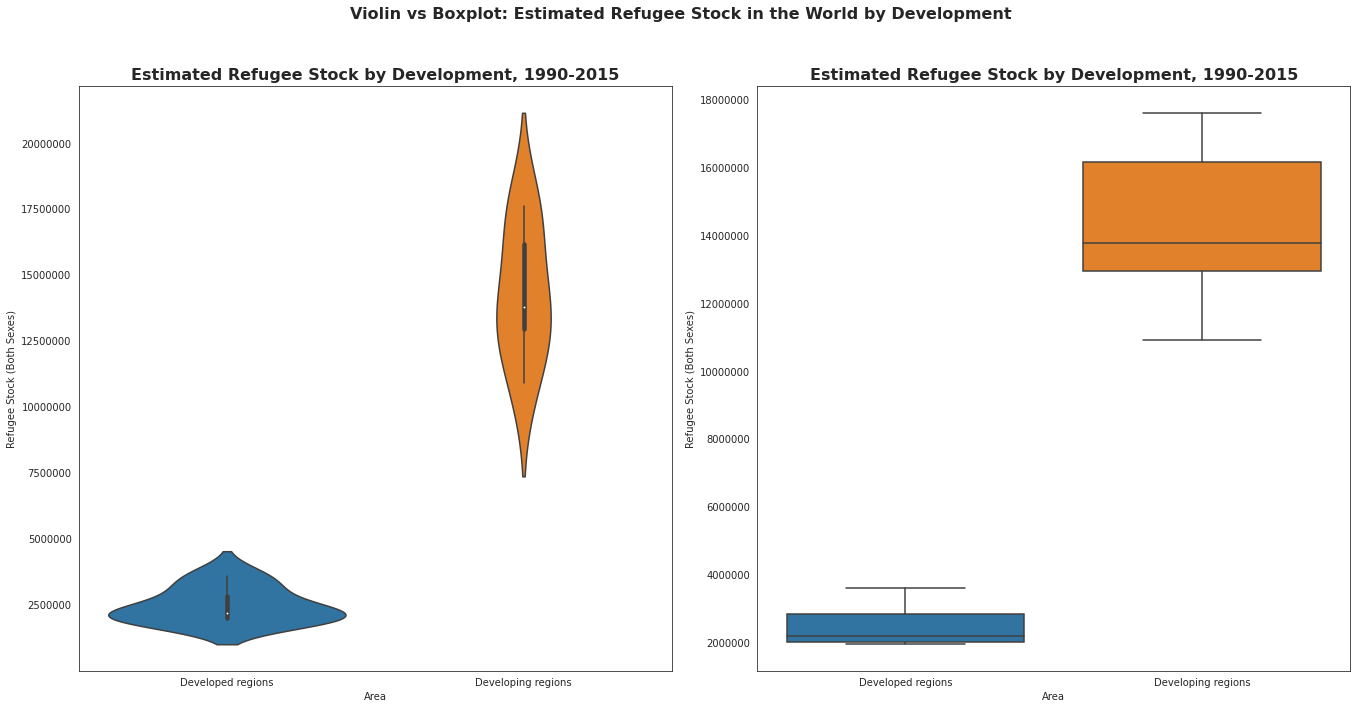

In [26]:
#import libraries
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_style('white')

#create small multiple
f, ax = plt.subplots(1, 2, figsize=(19,10))
f.suptitle('Violin vs Boxplot: Estimated Refugee Stock in the World by Development',fontweight='bold',fontsize=16)

#create the violin plot
ax[0].set_title('Estimated Refugee Stock by Development, 1990-2015',fontweight="bold", fontsize=16)
sns.violinplot(data=ed_ing, x="Area", y="Refugee Stock (Both Sexes)",ax=ax[0])
ax[0].ticklabel_format(style='plain', axis='y')

#create the box plot
ax[1].set_title('Estimated Refugee Stock by Development, 1990-2015',fontweight="bold",fontsize=16)
sns.boxplot(data=ed_ing, x="Area", y="Refugee Stock (Both Sexes)", ax=ax[1])
ax[1].ticklabel_format(style='plain', axis='y')


f.tight_layout()
f.subplots_adjust(top=.87)
plt.show() 



### 12.Line plot: Compare refugee stock by development

In [24]:
#create data frame with selected rows 
er_compare= est_rs1.loc[(est_rs1.Area== 'WORLD')|(est_rs1.Area== 'Developed regions')|(est_rs1.Area== 'Developing regions')]

#change the datatype accordingly 
er_compare['Refugee Stock (Both Sexes)']=er_compare['Refugee Stock (Both Sexes)'].astype(int)

er_compare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 1327
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          18 non-null     object
 1   Area                        18 non-null     object
 2   Refugee Stock (Both Sexes)  18 non-null     int64 
 3   Year                        18 non-null     object
dtypes: int64(1), object(3)
memory usage: 720.0+ bytes


<ipython-input-24-8df8a438351a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er_compare['Refugee Stock (Both Sexes)']=er_compare['Refugee Stock (Both Sexes)'].astype(int)


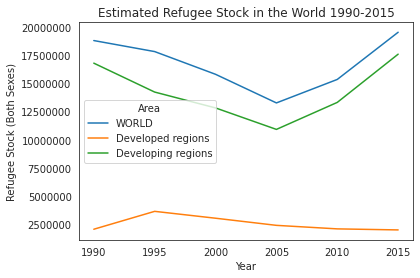

In [25]:
#create a line plot
sns.lineplot(y="Refugee Stock (Both Sexes)", x="Year", hue="Area",ci=None, data=er_compare).set(title='Estimated Refugee Stock in the World 1990-2015')
plt.ticklabel_format(style='plain', axis='y')

###Refugees as a percentage of the international migrant stock as a separate dataset 

In [16]:
#Create a dataframe with columns for refugee as a percentage of the international migrant stock 
per_rs = ers_df2[['ID','Area','Percentage 1990', 'Percentage 1995', 'Percentage 2000', 'Percentage 2005',    
                 'Percentage 2010', 'Percentage 2015']]

#column headers "year" are values not variable names. Violate principle 2. Unpivot to move year columns into rows. 
per_rs = pd.melt(per_rs, id_vars =["ID", "Area"] , var_name = "PYear", value_name = "Refugee Percentage")

#Column has 2 variables - percentage and year, let's split that 
per_rs=(per_rs.assign(Percentage = lambda x: x.PYear.str[:-4].astype(str), Year = lambda x: x.PYear.str[-4:].astype(str)).drop("PYear",axis=1))

#we don't need the "percentage" column because the whole observational unit refers to this. 
per_rs=per_rs.drop(['Percentage'], axis=1)  

per_rs

,ID,Area,Refugee Percentage,Year
0,1,WORLD,12.346732,1990
1,2,Developed regions,2.445494,1990
2,3,Developing regions,23.968236,1990
3,4,Least developed countries,45.56588,1990
4,5,Less developed regions excluding least develop...,19.919743,1990
...,...,...,...,...
1585,261,Samoa,0.0,2015
1586,262,Tokelau,0.0,2015
1587,263,Tonga,0.0,2015
1588,264,Tuvalu,0.0,2015


In [17]:
#Order dataset based on ID and Year 
per_rs1= per_rs.sort_values(by =['ID', 'Year'] )

#Store the unique ID-Area in est_rs3
per_rs1= per_rs1.set_index(['ID','Area','Year'])

per_rs1

Refugee Percentage
ID  Area                      Year                   
1   WORLD                     1990          12.346732
                              1995          11.103013
                              2000           9.164736
                              2005           6.941389
                              2010           6.932687
...                                               ...
265 Wallis and Futuna Islands 1995                0.0
                              2000                0.0
                              2005                0.0
                              2010                0.0
                              2015                0.0

[1590 rows x 1 columns]

###13. Line Chart:Refugee Stock as a Percentage in International Migration 

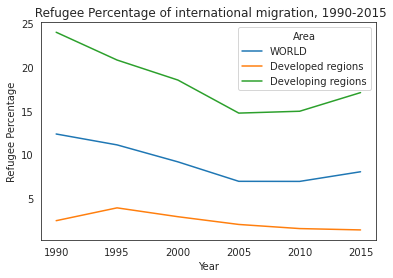

In [27]:
#Refugee Percentage values should be floats, not objects 
per_rs['Refugee Percentage']=per_rs['Refugee Percentage'].astype(float)

#create dataframe with selected rows 
rp_compare= per_rs.loc[(per_rs.Area== 'WORLD')|(per_rs.Area== 'Developed regions')|(per_rs.Area== 'Developing regions')]

#create the line plot
sns.lineplot(y="Refugee Percentage", x="Year", hue="Area",ci=None, data=rp_compare).set(title=' Refugee Percentage of international migration, 1990-2015')
plt.ticklabel_format(style='plain', axis='y')